In [230]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

plt.style.use(['science', 'notebook', 'grid'])

In [231]:
##Parte 1 (Resistor de resistecia R = (9.8 +- 0,1) ohm)
R = 9.8 + 14.3
R_err = 0.1

L = 46.1 *1e-3
L_err = 0.1 *1e-3

C =  0.241 *1e-6
C_err =  0.001 *1e-6

f = np.array([1.5450, 1.563, 1.582, 1.611, 1.669, 1.733, 1.802, 1.902, 2.005, 1.518, 1.5038, 1.4815, 1.4229, 1.3693, 1.3040, 1.2035, 1.1000, 1.0031]) *1e3
f_err = np.array([0.0001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]) *1e3

V_0 = np.array([2.561, 2.663, 2.972, 3.762, 5.000, 5.843, 6.294, 6.68, 6.88, 2.773, 3.103, 3.760, 5.141, 5.949, 6.476, 6.865, 7.062, 7.170])
V_0_err = np.array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.01, 0.01, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001])

V_R = np.array([0.914, 0.906, 0.859, 0.825, 0.693, 0.5603, 0.4623, 0.3628, 0.292, 0.900, 0.874, 0.832, 0.683, 0.552, 0.4313, 0.3104, 0.2333, 0.1854])
V_R_err = np.array([0.001, 0.001, 0.001, 0.001, 0.001, 0.0001, 0.0001, 0.0001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0001, 0.0001, 0.0001, 0.0001])


In [232]:
Omega_t = np.linspace(2*np.pi*min(f), 2*np.pi*max(f), 1000)

def teoria(Omega, omega_0, gamma, K):
    razao = K*(Omega*gamma)/np.sqrt((omega_0**2 - Omega**2)**2 +(Omega*gamma)**2)
    return razao

In [233]:
def func(x_data, omega_0, gamma, K):
    return teoria(x_data, omega_0, gamma, K)

popt, pcov = curve_fit(func, 2*np.pi*f, V_R/V_0, p0 = [1/np.sqrt(L*C),R/L,2])
omega_0, gamma, K = popt
omega_0_err, gamma_err, K_err = np.sqrt(np.diag(pcov))
r2 = r2_score(V_R/V_0, func(2*np.pi*f, *popt))

omega = np.sqrt(omega_0**2 + gamma**2/2)

print(f"omega = {omega}")

omega = 9709.98944622925


Text(0.5, 1.0, 'Análise de Ressonância')

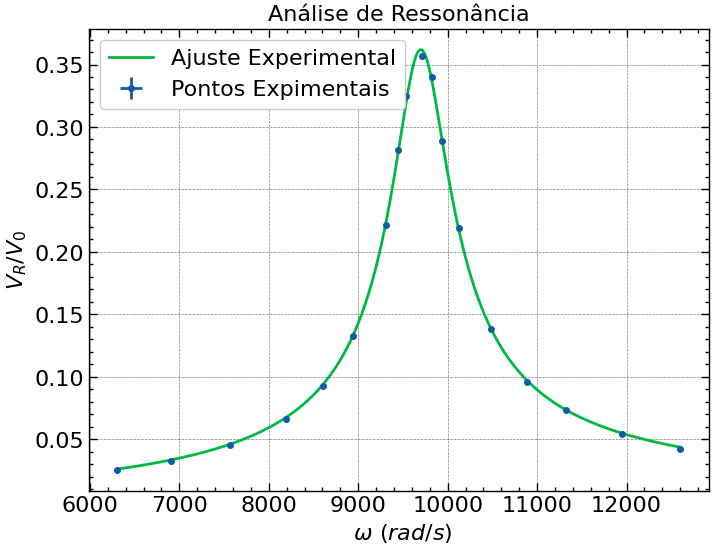

In [234]:
x_data = 2*np.pi*f
x_data_err = 2*np.pi*f_err

y_data = V_R/V_0
y_data_err = V_R_err/V_0 + V_R/(V_0**2) *V_0_err

plt.errorbar(x_data, y_data, xerr=x_data_err, yerr= y_data_err, marker = 'o',ms = 4, ls = '', label = 'Pontos Expimentais')
plt.plot(Omega_t, teoria(Omega_t,omega_0, gamma, K),  label = 'Ajuste Experimental')

plt.xlabel(r"$\ \omega \ (rad/s)$")
plt.ylabel(r"$V_R/V_0$")
plt.legend()
plt.title("Análise de Ressonância")

In [235]:
omega_0 = np.sqrt(1/(C*L))
gamma = R/L

omega = np.sqrt(omega_0**2 + gamma**2/2)

print(f"omega = {omega}")

omega = 9494.46356661729


In [236]:
##Parte 2 (Resistor de resistecia R = (99.0 +- 0,1) ohm)
##observação: As frequências utilizadas foram as mesmas da (Parte 1)

R = 99.0 + 14.3
R_err = 0.1

L = 46.1 *1e-3
L_err = 0.1 *1e-3

C =  0.241 *1e-6
C_err =  0.001 *1e-6

f = np.array([1.5450, 1.563, 1.582, 1.611, 1.669, 1.733, 1.802, 1.902, 2.005, 1.518, 1.5038, 1.4815, 1.4229, 1.3693, 1.3040, 1.2035, 1.1000, 1.0031]) *1e3
f_err = np.array([0.0001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]) *1e3

V_0 = np.array([5.157, 5.128, 5.154, 5.225, 5.424, 5.703, 5.973, 6.32, 6.56, 5.175, 5.200, 5.225, 5.471, 5.762, 6.112, 6.540, 6.826, 6.998])
V_0_err = np.array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.01, 0.01, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001])

V_R = np.array([4.309, 4.278, 4.236, 4.185, 3.975, 3.673, 3.367, 2.942, 2.567, 4.264, 4.201, 4.181, 3.949, 3.636, 3.226, 2.621, 2.107, 1.728])
#As incertezas para todos os valores de V_R são a mesma (0,001 ohm).


In [237]:
def func(x_data, omega_0, gamma, K):
    return teoria(x_data, omega_0, gamma, K)

popt, pcov = curve_fit(func, 2*np.pi*f, V_R/V_0, p0 = [1/np.sqrt(L*C),R/L,2])
omega_0, gamma, K = popt
omega_0_err, gamma_err, K_err = np.sqrt(np.diag(pcov))
r2 = r2_score(V_R/V_0, func(2*np.pi*f, *popt))
omega = np.sqrt(omega_0**2 + gamma**2/2)

print(f"omega = {omega}")

omega = 9904.793684625965


Text(0.5, 1.0, 'Análise de Ressonância')

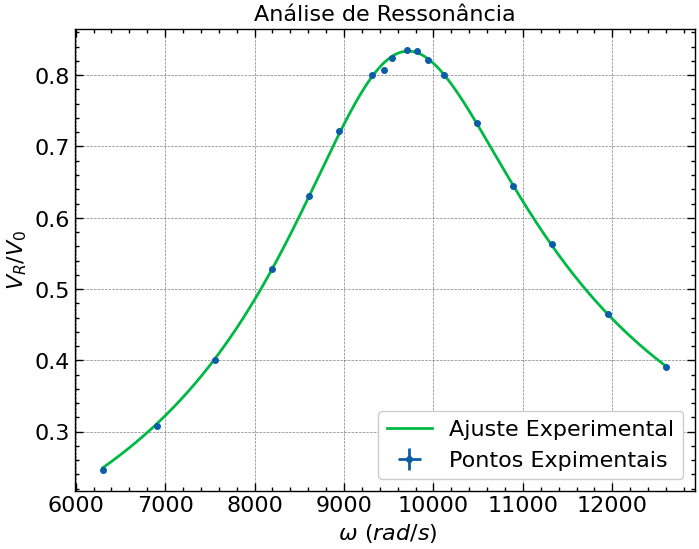

In [238]:
x_data = 2*np.pi*f
x_data_err = 2*np.pi*f_err

y_data = V_R/V_0
y_data_err = V_R_err/V_0 + V_R/(V_0**2) *V_0_err

plt.errorbar(x_data, y_data, xerr=x_data_err, yerr= y_data_err, marker = 'o',ms = 4, ls = '', label = 'Pontos Expimentais')
plt.plot(Omega_t, teoria(Omega_t,omega_0, gamma, K),  label = 'Ajuste Experimental')

plt.xlabel(r"$\ \omega \ (rad/s)$")
plt.ylabel(r"$V_R/V_0$")
plt.legend()
plt.title("Análise de Ressonância")

In [239]:
omega_0 = np.sqrt(1/(C*L))
gamma = R/L

omega = np.sqrt(omega_0**2 + gamma**2/2)

print(f"omega = {omega}")

omega = 9645.119853569937
